Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States.

Assualt- Assualt rate in different places of United States.

UrbanPop - urban population in different places of United States.

Rape - Rape rate in different places of United States.


In [1]:
from sklearn.metrics import silhouette_score
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data.csv


In [4]:
Crime_data=pd.read_csv('crime_data.csv')
Crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
Crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
Data=Crime_data.iloc[:,1:]
Data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [8]:
import plotly.express as px

In [9]:
fig=px.scatter_matrix(Data,width=600,height=800)
fig.show()

In [10]:
fig2=px.scatter_3d(Crime_data,x='Murder',
                   y='Assault',z='UrbanPop',color='Unnamed: 0',size='Rape')
fig2.update_layout(title='5 D representation')
fig2.show()

Heirarchical Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [12]:
#Standardising for clustering
scale=StandardScaler()
Final_Data=Data.copy()
scaled_data=scale.fit_transform(Final_Data)
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

<Figure size 2500x1000 with 0 Axes>

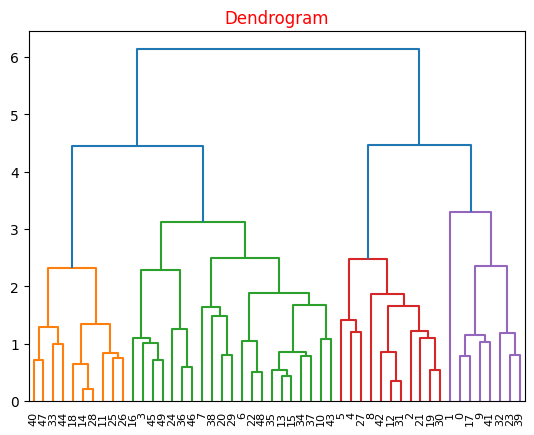

<Figure size 2500x1000 with 0 Axes>

In [13]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
DENDROGRAM=sch.dendrogram(sch.linkage(scaled_data,'complete'))
plt.rcParams['figure.figsize'] = (25, 10)
plt.title("Dendrogram",c='r')
plt.figure()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/pytho

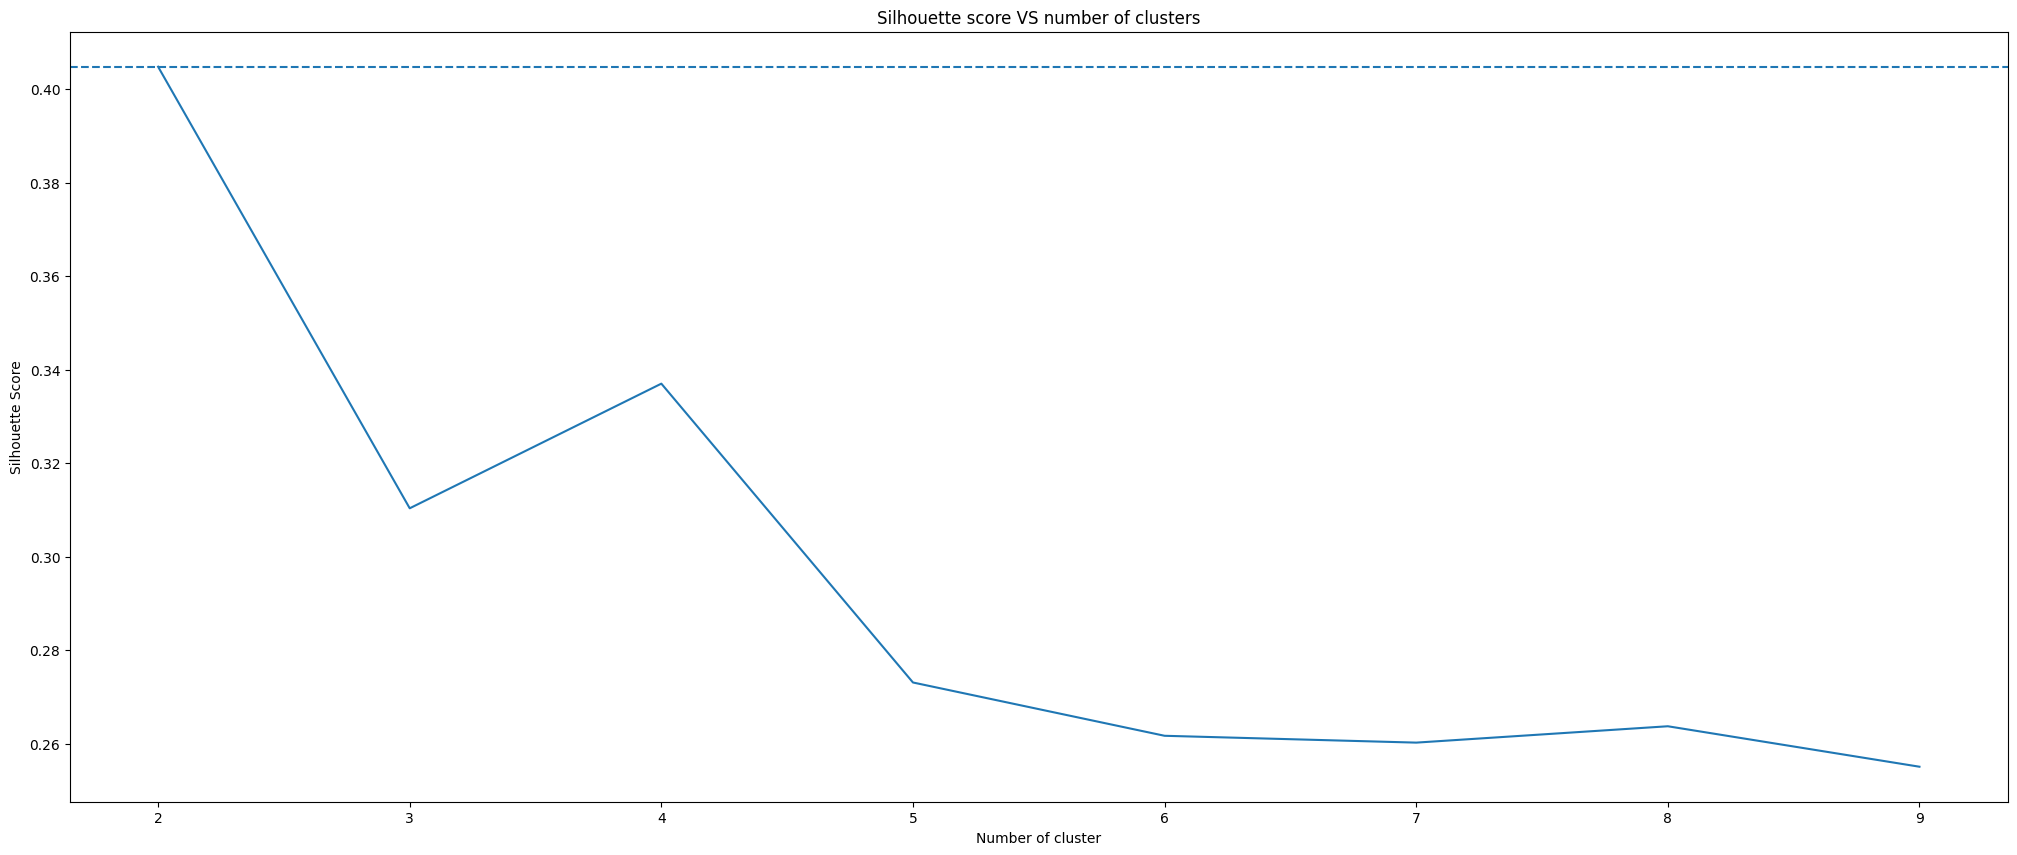

In [14]:
#Finding number of clusters for Best Silhouette score
score=[]
for i in range(2,10):
    Agglomerative=AgglomerativeClustering(n_clusters=i,affinity="euclidean")
    model=Agglomerative.fit(scaled_data)
    score.append(silhouette_score(scaled_data,model.labels_))

plt.plot(range(2,10),score)
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette score VS number of clusters")
plt.axhline(y=max(score),linestyle='--')

In [15]:
Cluster_=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')
y_hc=Cluster_.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [16]:
print("Silhouette score is:",max(score))

Silhouette score is: 0.4047944502519567


In [17]:
Clusters=pd.DataFrame(data=y_hc,columns=['cluster'])
Clusters

,cluster
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [18]:
Crime_data['Heirarchical_Cluster_Id']=Clusters
Crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Heirarchical_Cluster_Id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [19]:
Crime_data.groupby('Heirarchical_Cluster_Id').mean().iloc[:,0:4]

<ipython-input-19-e50d6586bd9f>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Murder,Assault,UrbanPop,Rape
Heirarchical_Cluster_Id,,,,
0,7.742857,168.877551,65.897959,20.757143
1,10.000000,263.000000,48.000000,44.500000


<ipython-input-20-9028479c551c>:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



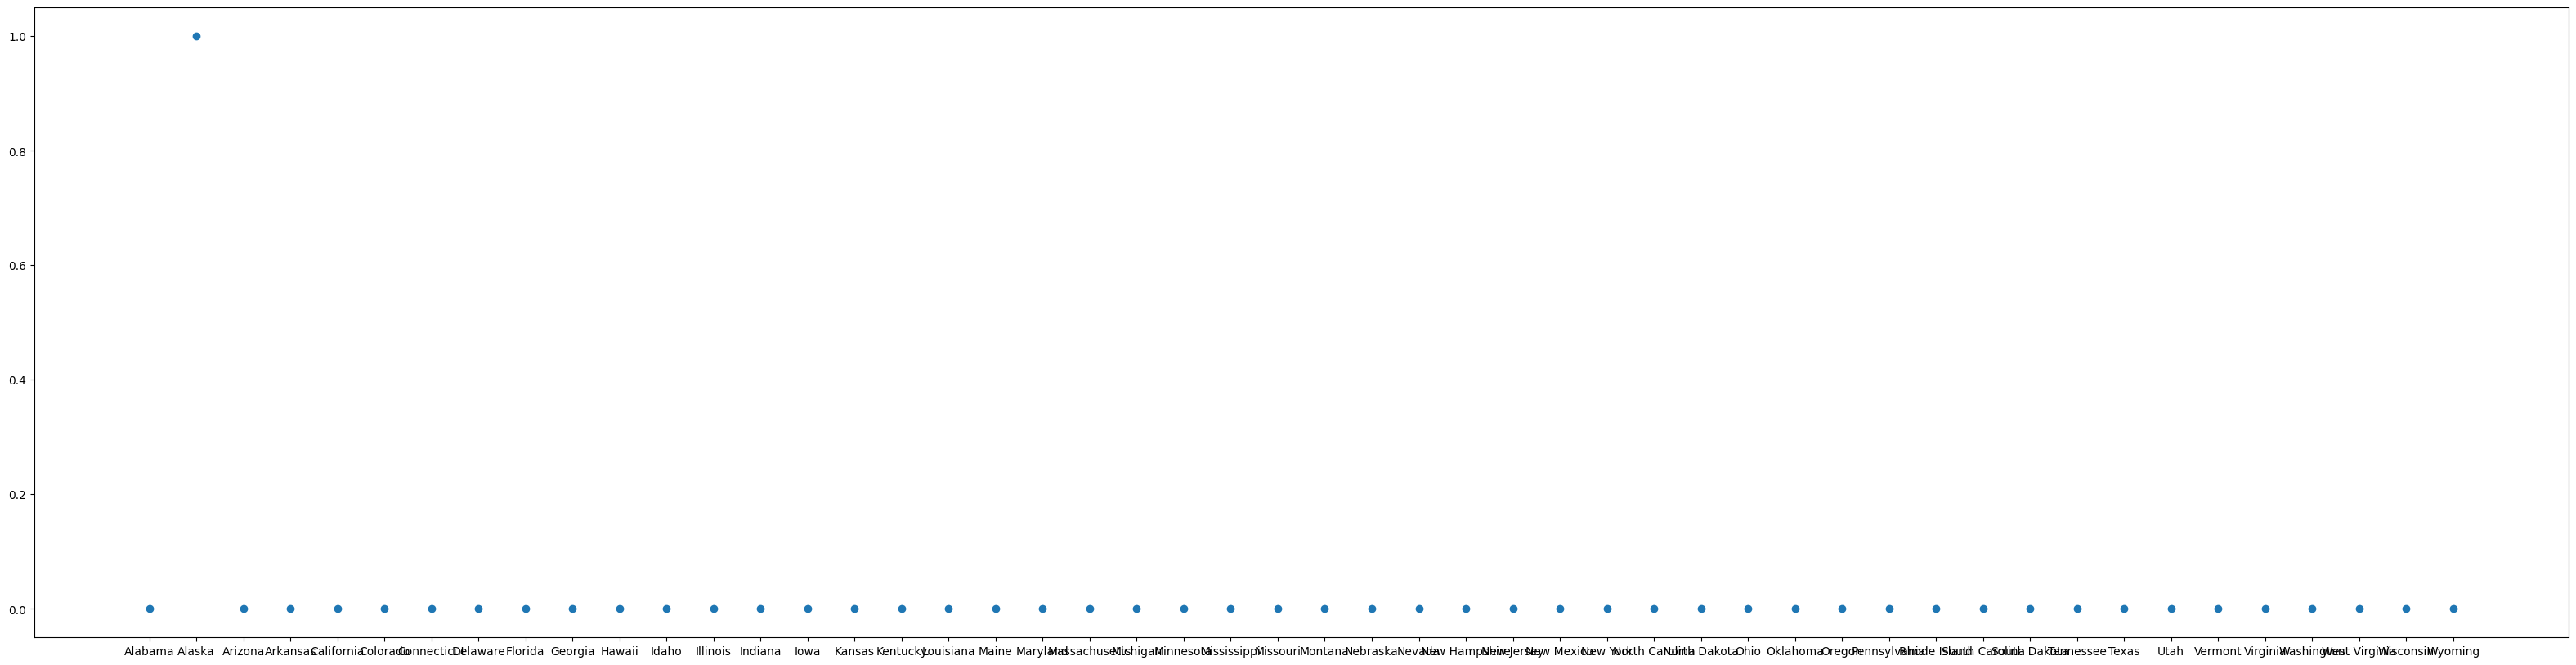

In [20]:
# Visualizing the clustering
plt.figure(figsize =(40,10))
plt.scatter(Crime_data['Unnamed: 0'],Crime_data['Heirarchical_Cluster_Id'],cmap='rainbow')
plt.show()

K-Means Cluster

In [21]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

[200.00000000000003, 104.96163315756871, 80.0888613219962, 57.55425863091105, 50.52026552535068, 43.927464044975736, 40.52183461131976, 34.68738839784909, 32.70648136388185, 28.311639397122548, 24.316560656810115]


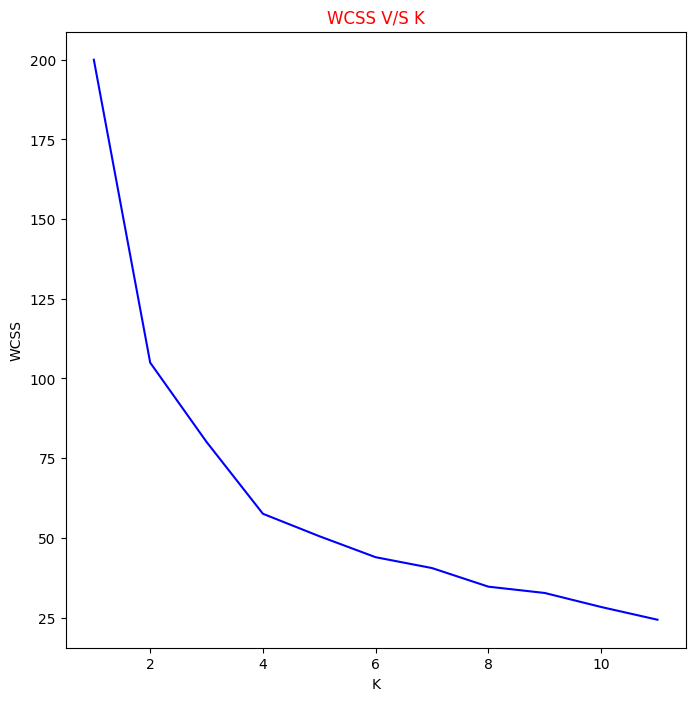

In [22]:
#Hyper parameter tuning for K Centroids
wcss=[]

for i in range(1,12):
  KMeans_cluster=KMeans(n_clusters=i,random_state=0)
  KMeans_cluster.fit(scaled_data)
  wcss.append(KMeans_cluster.inertia_)
print(wcss)
plt.figure(figsize=(8,8))
plt.title('WCSS V/S K',c='r')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(range(1,12),wcss,c='blue')

So we can take K value as 4.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

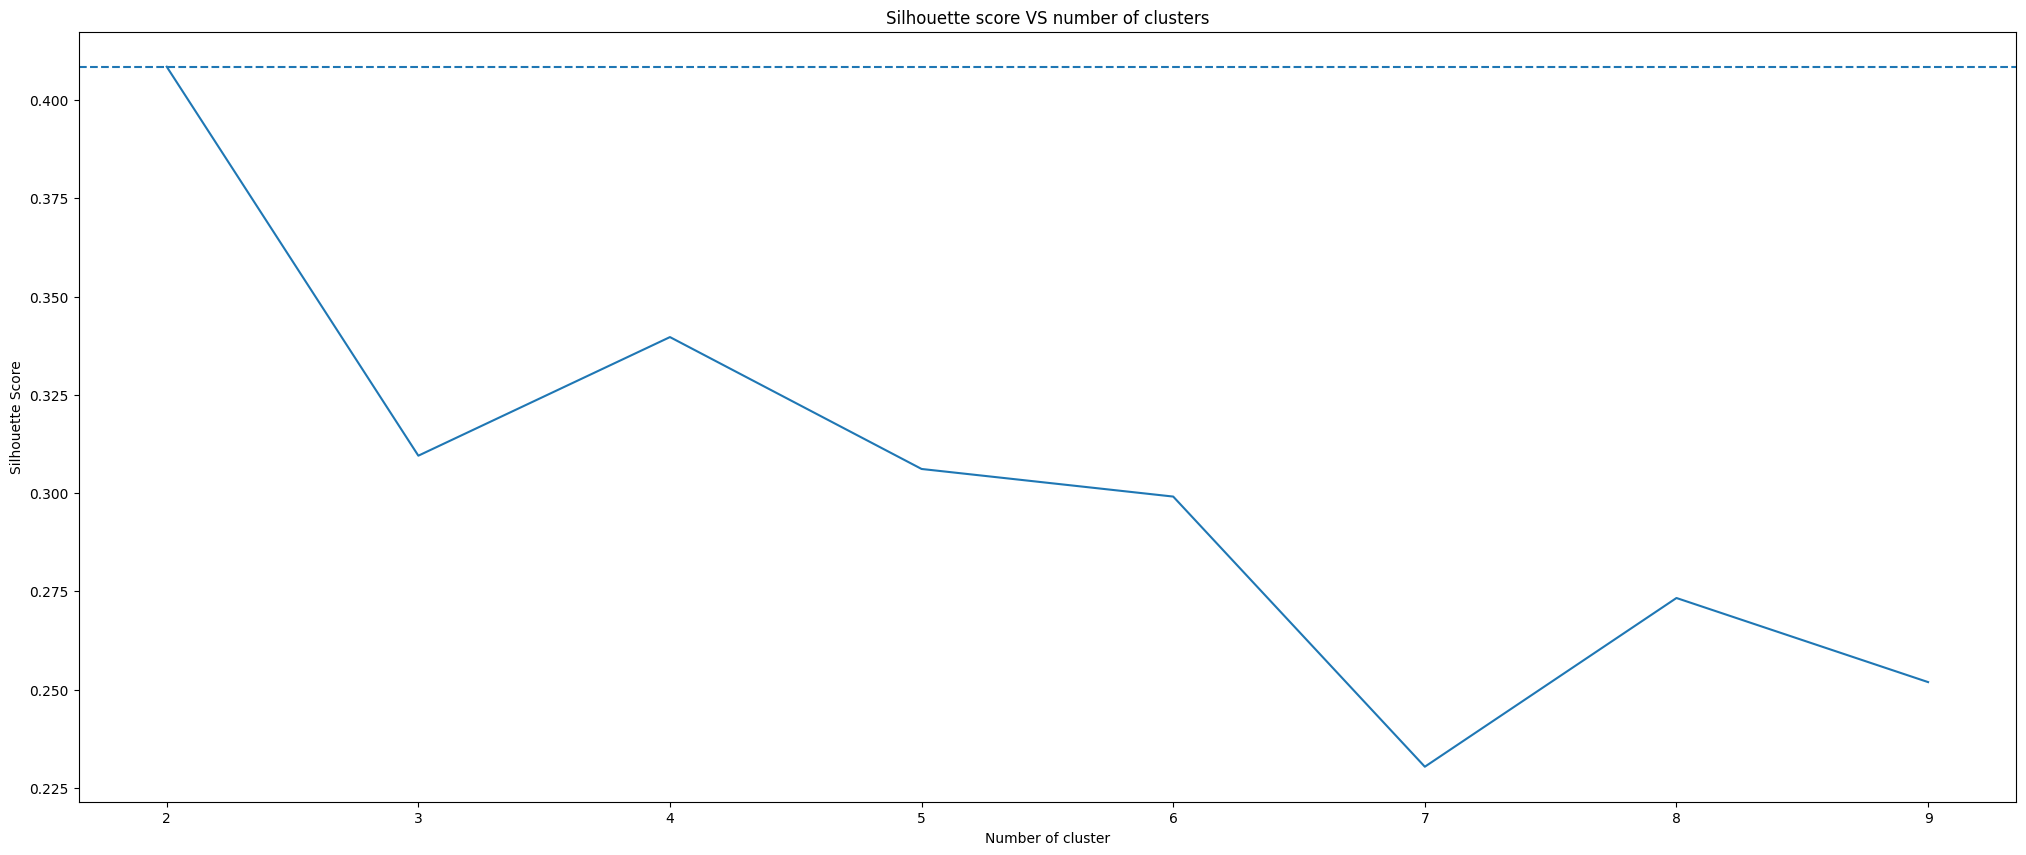

In [23]:
#Finding number of clusters for Best Silhouette score
score1=[]
for i in range(2,10):
    KMEANS_CLUSTER=KMeans(n_clusters=i,random_state=0)
    model1=KMEANS_CLUSTER.fit(scaled_data)
    score1.append(silhouette_score(scaled_data,model1.labels_))

plt.plot(range(2,10),score1)
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette score VS number of clusters")
plt.axhline(y=max(score1),linestyle='--')

In [24]:
KMEANS_CLUSTER=KMeans(n_clusters=2,random_state=0)
KMEANS_CLUSTER.fit(scaled_data)
KMEANS_CLUSTER

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2, random_state=0)

In [28]:
print("Silhouette score is:",max(score1))

Silhouette score is: 0.4084890326217641


In [29]:
KMEANS_CLUSTER.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [30]:
Crime_data['KmeansCluster_Id']=KMEANS_CLUSTER.labels_

<ipython-input-31-3b499a08fa7f>:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



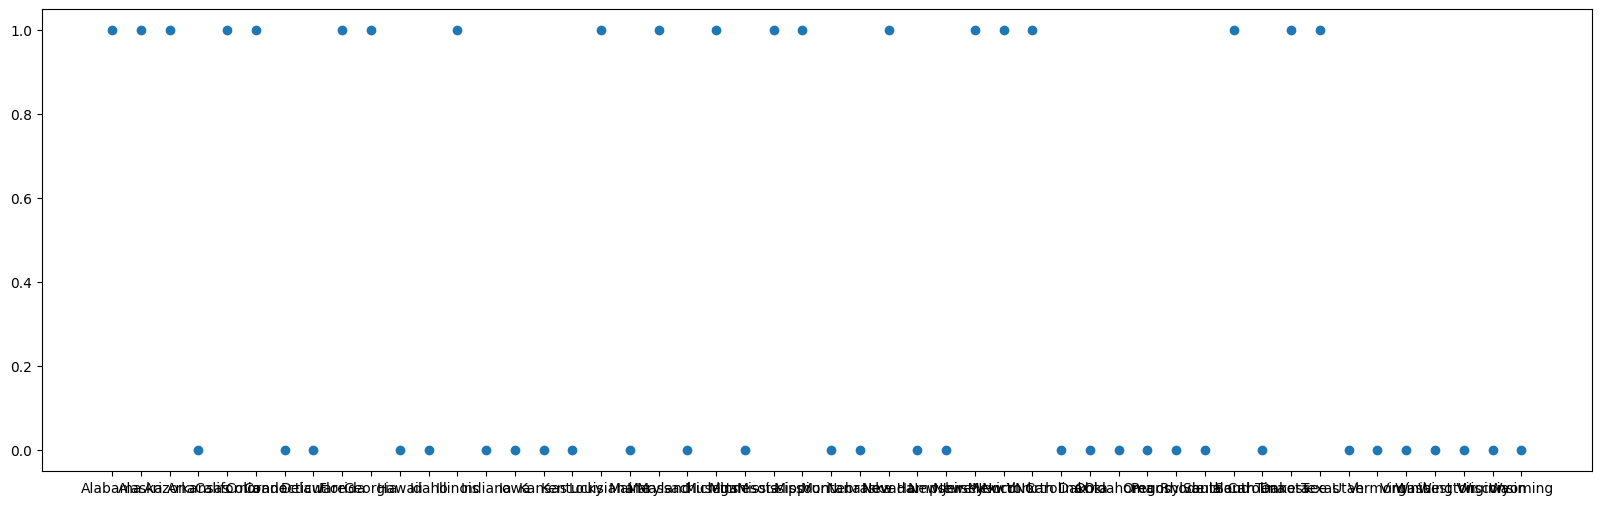

In [31]:
# Visualizing the clustering
plt.figure(figsize =(20, 6))
plt.scatter(Crime_data['Unnamed: 0'],Crime_data['KmeansCluster_Id'],
            cmap='rainbow')
plt.show()

In [32]:
Crime_data.groupby('KmeansCluster_Id').mean().iloc[:,0:4]

<ipython-input-32-27c48d2117c8>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Murder,Assault,UrbanPop,Rape
KmeansCluster_Id,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


DBSCAN

In [33]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import RobustScaler

In [34]:
scale=RobustScaler()
Final_Data1=Data.copy()
scaled_data1=scale.fit_transform(Final_Data1)

In [36]:
#Hyper parameter tuning for DB SCAN
import numpy as np
eps=np.linspace(0.1,5,20)
min_samp=range(3,10)
sil=[]
for i in eps:
    for j in min_samp:
        Dbscan=DBSCAN(eps=i,min_samples=j).fit(scaled_data1)
        labels=Dbscan.labels_
        if len(set(labels))>1:
            sil.append([i,j,silhouette_score(scaled_data1,labels)])

In [37]:
dataframe=pd.DataFrame(sil,columns=['eps','min_samp','silhouette_score']).sort_values(
    ['silhouette_score'],ascending=False)
dataframe

,eps,min_samp,silhouette_score
15,0.873684,9,0.354996
14,0.873684,8,0.354996
10,0.873684,4,0.340952
11,0.873684,5,0.340952
17,1.131579,4,0.303835
28,1.389474,8,0.303835
27,1.389474,7,0.303835
26,1.389474,6,0.303835
25,1.389474,5,0.303835
24,1.389474,4,0.303835


In [39]:
def Dbscan(array,eps,minsamp):
  #X=StandardScaler().fit_transform(array)
  DBSCAN_CLUSTER=DBSCAN(eps=eps,min_samples=minsamp)
  db=DBSCAN(eps=eps,min_samples=minsamp)
  db.fit(scaled_data1)
  y_pred=db.fit_predict(scaled_data1)
  Crime_data['DBSCAN_Cluster']=y_pred
  plt.scatter(scaled_data1[:,2],scaled_data1[:,1],c=y_pred,cmap='Paired')
  plt.title('DBSCAN')
  sc=metrics.silhouette_score(scaled_data1,db.labels_)
  print(sc,"is Silht.Score")

0.3549960356668332 is Silht.Score


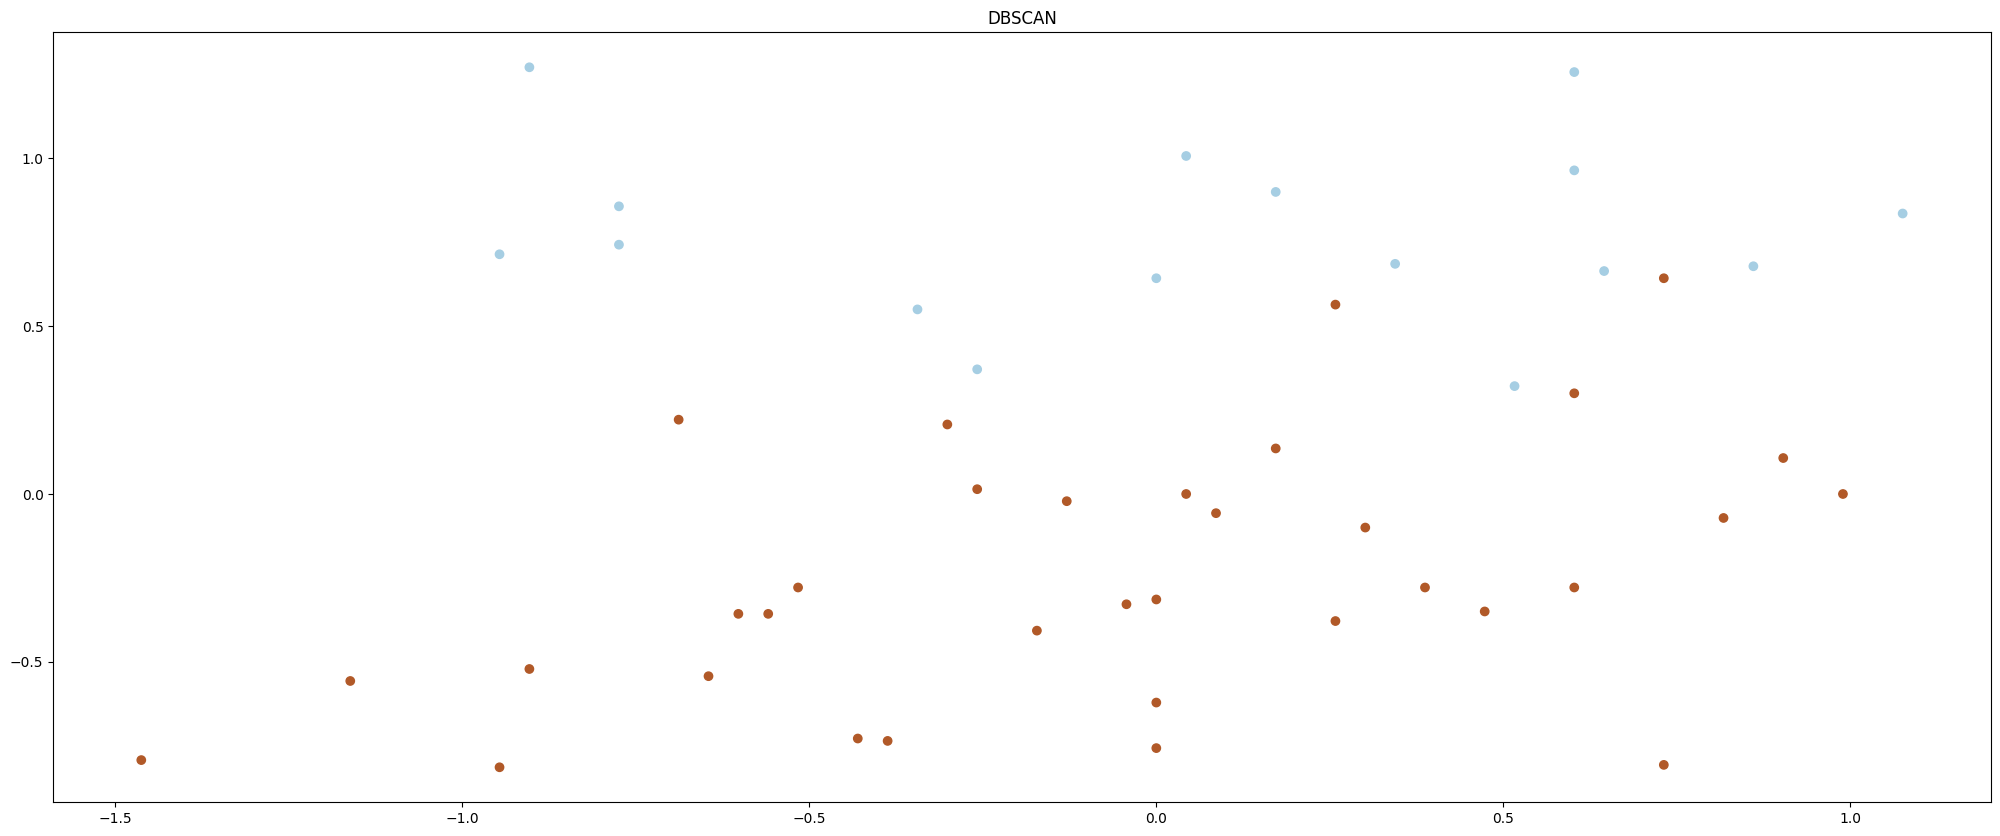

In [40]:
Dbscan(scaled_data1,0.873684,9)

<ipython-input-41-13642da133c3>:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



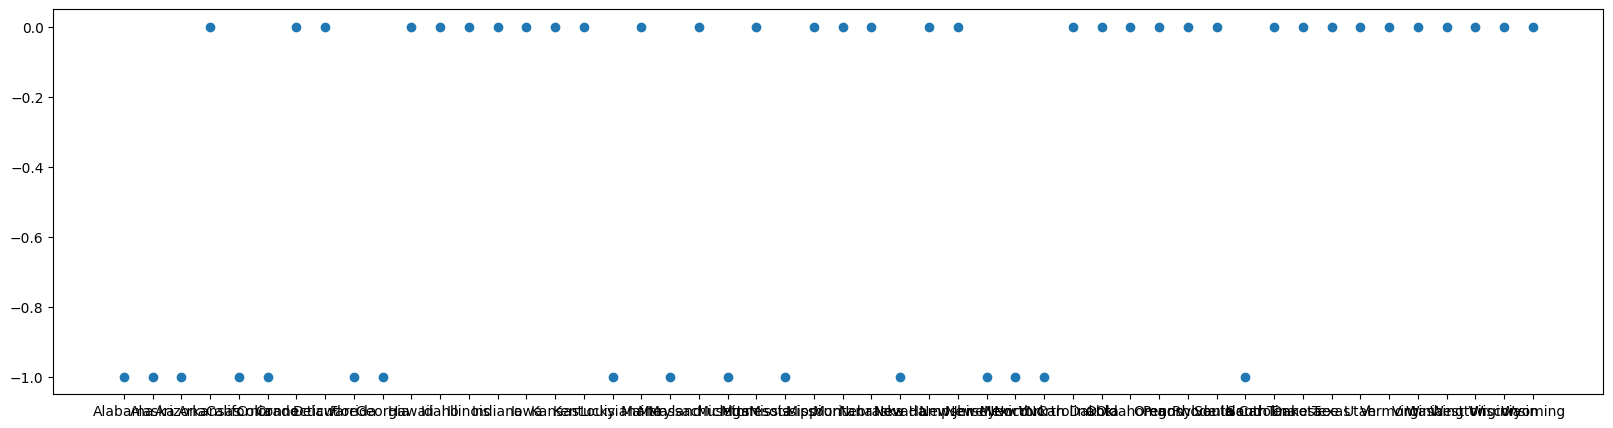

In [41]:
#plotting Cluster Id vs Passenger ID
fig=plt.figure(figsize=(20,5))
plt.scatter(Crime_data['Unnamed: 0'],Crime_data['DBSCAN_Cluster'],cmap='rainbow')

In [42]:
#percentage of nopisy points which represented as cluster id "-1"
(len(Crime_data[Crime_data['DBSCAN_Cluster']==-1])/len(Crime_data))*100

32.0

In [43]:
Crime_data.groupby('DBSCAN_Cluster').mean().iloc[:,0:4]

<ipython-input-43-e8eb686a1e0a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Murder,Assault,UrbanPop,Rape
DBSCAN_Cluster,,,,
-1,12.375000,268.062500,67.250000,29.918750
0,5.629412,124.970588,64.735294,17.144118


In [44]:
Crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Heirarchical_Cluster_Id,KmeansCluster_Id,DBSCAN_Cluster
0,Alabama,13.2,236,58,21.2,0,1,-1
1,Alaska,10.0,263,48,44.5,1,1,-1
2,Arizona,8.1,294,80,31.0,0,1,-1
3,Arkansas,8.8,190,50,19.5,0,0,0
4,California,9.0,276,91,40.6,0,1,-1
5,Colorado,7.9,204,78,38.7,0,1,-1
6,Connecticut,3.3,110,77,11.1,0,0,0
7,Delaware,5.9,238,72,15.8,0,0,0
8,Florida,15.4,335,80,31.9,0,1,-1
9,Georgia,17.4,211,60,25.8,0,1,-1
